(chap:13a-random)=
# ランダム変数と統計的特徴

<div name="html-admonition" style="font-size: 0.8em">
<input type="button" onclick="location.href='https://translate.google.com/translate?hl=&sl=ja&tl=en&u='+window.location;" value="Google translation" style="color:#ffffff;background-color:#008080; height:25px" onmouseover="this.style.background='#99ccff'" onmouseout="this.style.background='#008080'"/> in English or the language of your choice.
</div><br>

In [9]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

import japanize_matplotlib
import py4macro

# numpy v1の表示を使用
np.set_printoptions(legacy='1.21')
# 警告メッセージを非表示
import warnings
warnings.filterwarnings("ignore")

## はじめに

この章以降では短期的なマクロ経済分析について議論し、特に、景気循環の発生メカニズムの理解が大きな目的である。
本章は、その最初の章であり、分析の大前提となるランダム変数について説明し、マクロ経済分析において重要となる統計的な特徴について復習する。

GDPや消費などのマクロ変数は右上がりの長期的なトレンドがある。
また、失業率やインフレ率に関しても長期的なトレンドを考えることもできる。
トレンドの詳細については後に議論するとして、トレンドの周りをマクロ変数が変動し、それが景気循環だと解釈できる。
下の図では、日本のGDPの長期的トレンドからの乖離をパーセントで表している。
波打つように上下に、時には小刻みに、また時には大きく乱高下しているように見える。

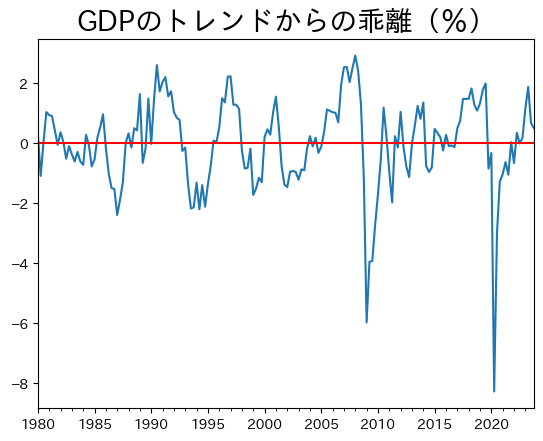

In [10]:
# データの読み込み
df = py4macro.data('jpn-q')

# トレンドからの％乖離のデータの作成
df['gdp_cycle'] = 100 * (
    np.log( df['gdp'] ) - py4macro.trend( np.log(df['gdp']) )
)

# プロット
# ax = df.plot(y='gdp_cycle')
ax = df['gdp_cycle'].plot()
ax.set_title('GDPのトレンドからの乖離（％）', size=20)
ax.axhline(0, c='red')
pass

このようなGDPの変動を説明する方法として２つある。
1. 決定的（deterministic）な過程で生成された時系列として捉える。
1. ランダム（stochastic）な過程で生成された時系列として捉える。

１の考えによると，差分方程式$x_{t+1}=f(x_t)$のように来期のGDPは今期のGDPに依存している。マクロ変数の持続性を捉えるには必要不可欠な特徴と言えるだろう。しかし，今期のGDP（$x_t$）が与えられると来期のGDP（$x_{t+1}$）は自ずと決定さることになり，来期のGDPの予測は簡単なものとなる。もしそうであれば政策運営は非常に簡単であろうが，現実はそうではない。そういう意味では，１は現実を十分に捉えることができていない。

一方，２の考えはランダム変数の実現値の連続としてGDPが観測され，今期のGDPが与えられても来期のGDPにはランダムな要素があるため，予測が難しいという特徴がある。この特徴こそが，マクロ変数の性質を捉えるには必要な要素であり，上のプロットに現れていると考えられる。主流のマクロ経済学では，消費者や企業の行動はフォーワード・ルッキングであり（将来を見据えた最適化行動であり），且つ経済全体ではランダムな（不確実な）要素が重要な役割を果たしているという考え基づいている。そのような分析枠組みの中で，景気循環のメカニズムを解明することが目的となっている。

以下では，まず，ランダム変数について復習し、マクロ変数を捉えるにはどのようなランダム変数生成過程が妥当かを検討する。
また、シミュレーションを通して、その統計的特徴を視覚的に確認する。

## ランダム変数の統計的特徴：復習

### ２つのランダム変数

#### 説明

`2`つのランダム変数$X_i$と$Y_i$, $i=1,2,3,\cdots,n$を考えよう。
例えば，$X_i$と$Y_i$は$n$個の`2`セットのサイコロ（合計`2`$n$個）を同時に投げた場合の目と考えることができる。
また、$X_i$の単位は円であり、$Y_i$はドル表示だとしよう（例えば，$X_i$のサイコロの目が`5`であれば`5`万円，$Y_i$のサイコロの目が`3`であれば`300`ドル）。
`2`変数の**不偏分散**は次のように定義される。

$$
\sigma_{X}^2=\frac{1}{n-1}\sum_{i=1}^{n}
\left(X_i-\overline{X}\right)^2
\qquad
\sigma_{Y}^2=\frac{1}{n-1}\sum_{i=1}^{n}
\left(Y_i-\overline{Y}\right)^2
$$

ここで$\overline{X}$と$\overline{Y}$は平均を表している。
（不偏）分散は、各ランダム変数の「散らばりの度合い」を数値化したものであり、$X_i$のの単位は$\text{円}^2$、$Y_i$の単位は$\text{ドル}^2$となる。
**標準偏差**は不偏分散の平方根である

$$
\sigma_{X},
\quad
\sigma_{Y}
$$

となり、$\sigma_{X}$の単位は円となり、$\sigma_{Y}$の単位はドルである。

次に、`2`変数の相関を考えたい訳だが、その尺度として共分散が使われ、次のように定義される。

$$
\sigma_{XY}=\frac{1}{n-1}\sum_{i=1}^{n}
\left(X_i-\overline{X}\right)\left(Y_i-\overline{Y}\right)
$$

符号の解釈：
* $\sigma_{XY}=0$：無相関
* $\sigma_{XY}>0$：正の相関
* $\sigma_{XY}<0$：負の相関

共分散の絶対値が大きければ大きい（小さい）程，相関度が高い（低い）ことを意味するが、その値は単位に依存することになる。
$\sigma_{XY}$の単位は円xドルである。

また上の定義から次が成立することが簡単に理解できる。

$$
\sigma_{XX}=\sigma_{X}^2,
\qquad
\sigma_{YY}=\sigma_{Y}^2,
$$

共分散の特徴は$X_i$と$Y_i$の単位に依存することである。
例えば、`2`つのランダム変数$K_i$と$Z_i$の単位がユーロと人民元としよう。
$\sigma_{XY}$と$\sigma_{KZ}$を計算できるが、単位が異なるため比較には向いていない。
その点を克服するのが**相関係数**であり、次のように定義される。

$$
\rho_{XY}=
\frac{\sigma_{XY}}{\sigma_X\sigma_Y}
$$

次の特徴がある。
* 分母は必ず正となるので，分子の共分散が符号を決定する。
* $\rho_{XY}$の値は`-1`から`1`の間の値を取り、単位に依存しない。この特徴は、分母に$X$と$Y$の標準偏差の積を積を置く事により分母の単位をキャンセルしているためである。

更に、$\rho_{XX}$を考えてみよう。

$$
\rho_{XX}=
\frac{\sigma_{XX}}{\sigma_X\sigma_X}
=\frac{\sigma_{X}^2}{\sigma_X^2}
=1
$$

同じ変数は完全に相関するため相関係数は`1`となる。
一般的には，$\rho_{XY}$の絶対値は`1`よりも小さな値となる。
相関係数の重要な特徴は単位には依存しないため，単位が異なる変数の相関度を比較するには有用な指標となる。
即ち、$\sigma_{XY}$と$\sigma_{KZ}$を比較して、どちらが相関度が高いかを容易に確認できることになる。

#### `.cov`と`.corr()`

共分散と相関係数の違いを説明したが，`DataFrame`を使ってどのように計算するかを説明する。`dfex1`は次のような`DataFrame`になっている。

In [11]:
def create_example(n):
    rng = np.random.default_rng()
    df = pd.DataFrame({'X':rng.normal(10, 1, size=n),
                       'Y':rng.uniform(0, 100, size=n)})
    return df

dfex1 = create_example(10)

In [12]:
dfex1

,X,Y
0,10.875352,5.333614
1,10.065056,41.035620
2,11.744110,77.021350
3,11.819713,74.705772
4,11.437074,82.617324
5,8.487176,87.610043
6,11.889709,77.796288
7,9.806767,61.264819
8,9.647793,88.071896
9,11.290295,51.462952


`DataFrame`には分散と共分散を計算するメソッド`.cov()`が用意されている。
結果を`vcov`に割り当てよう。

In [13]:
vcov1 = dfex1.cov()
vcov1

,X,Y
X,1.320684,-2.506850
Y,-2.506850,676.331109


`vcov`は分散共分散行列と呼ばれる。
左上と右下の対角線上にあるのは、`X`と`Y`の不偏分散（$\sigma_{X}^2$と$\sigma_{Y}^2$）である。
一方、右上と左下の値（同じ値となる）が共分散（$\sigma_{XY}$）である。

相関係数はメソッド`.corr()`を使って求めることができる。

In [14]:
dfex1.corr()

,X,Y
X,1.000000,-0.083878
Y,-0.083878,1.000000


右上と左下の値（同じ値となる）が相関係数（$\rho_{XY}$）である。
一方、左上の値は`X`と`X`の相関係数（$\rho_{XX}=1$）であり，右下の対角線上にあるのは、`Y`と`Y`の相関係数（$\rho_{XX}=1$）である。

`vcov1`を使い相関係数を計算することもできる。

In [15]:
vcov1.loc['X','Y'] / ( vcov1.loc['X','X']**0.5 * vcov1.loc['Y','Y']**0.5 )

-0.08387822546247928

### 時系列のランダム変数

#### 説明

マクロ経済学では，時系列データを頻繁に扱うことになる。難しく思う必要はなく，基本的には上で説明した概念を「時系列的」に再解釈するだけで良い。既出のランダム変数$X_i$と$Y_i$，$i=1,2,3,\cdots,n$を時系列データとして次のように置き換えてみよう。

* $X_i\;\Rightarrow\;\varepsilon_t,\quad t=0,1,2,3,\cdots$
* $Y_i\;\Rightarrow\;\varepsilon_{t-1},\quad t=1,2,3,\cdots$

$X_i$の例として，**同時**に投げた$n$個のサイコロの目と考えることができると説明したが，同じ例を使うとすれば，次のようになるだろう。
* $\varepsilon_0$は第`0`期に投げたサイコロの目
* $\varepsilon_1$は第`1`期に投げたサイコロの目
* $\varepsilon_2$は第`2`期に投げたサイコロの目
* $\cdots\cdots$

同様に$Y_i$を考えることができる。違いは，$\varepsilon_{t-1}$は`1`期前の値を表していることだけである。
従って，
* 第`1`期では
    * $\varepsilon_t$は第`1`期に投げたサイコロの目
    * $\varepsilon_{t-1}$は第`0`期に投げたサイコロの目
* 第`2`期では
    * $\varepsilon_t$は第`2`期に投げたサイコロの目
    * $\varepsilon_{t-1}$は第`1`期に投げたサイコロの目
* 第`3`期では
    * $\varepsilon_t$は第`3`期に投げたサイコロの目
    * $\varepsilon_{t-1}$は第`2`期に投げたサイコロの目
* $\cdots\cdots$

ここで第`0`期の$\varepsilon_{t-1}$の値は存在しないことに注意しよう。

更に，$\varepsilon_{t-1}$を次のように一般化しよう。
* $\varepsilon_{t-s},\quad t=s,\;s+1,\;s+2,\;s+3,\;\cdots,\quad s\geq 1$

一見すると複雑に見えるが，$s=1$と置けば$\varepsilon_{t-1}$になることが分かる。
$\varepsilon_{t-s}$は単純に$s$期前の値を表しているに過ぎない。
従って，
* 第`s`期では
    * $\varepsilon_t$は第`s`期に投げたサイコロの目
    * $\varepsilon_{t-s}$は第`0`期に投げたサイコロの目
* 第`s+1`期では
    * $\varepsilon_t$は第`s+1`期に投げたサイコロの目
    * $\varepsilon_{t-s}$は第`1`期に投げたサイコロの目
* 第`s+2`期では
    * $\varepsilon_t$は第`s+2`期に投げたサイコロの目
    * $\varepsilon_{t-s}$は第`2`期に投げたサイコロの目
* $\cdots\cdots$

ここで第`s-1`期以前の$\varepsilon_{t-s}$の値は存在しないことに注意しよう。

以下では，次のように置き換えて説明するが，分かりづらければ`s=1`として読み進めれば良いだろう。
* $X_i\;\Rightarrow\;\varepsilon_t,\quad t=0,1,2,3,\cdots$
* $Y_i\;\Rightarrow\;\varepsilon_{t-s},\quad t=s,\;s+1,\;s+2,\;s+3,\;\cdots,\quad s\geq 1$

まず$\varepsilon_{t}$と$\varepsilon_{t-s}$の分散を考えてみると，次のように置き換えることができる。

$$
\begin{aligned}
\sigma_X^2&\quad\Rightarrow\quad\sigma_{\varepsilon_t}^2\\
\sigma_Y^2&\quad\Rightarrow\quad\sigma_{\varepsilon_{t-s}}^2
\end{aligned}
$$

$X_i$と$Y_i$の分散は，`s`期ずれているだけの同じランダム変数$\varepsilon$の分散に置き換わっている。
* 解釈
    * $\sigma_{\varepsilon_t}^2$：$\varepsilon$の`0`期から`t`期までの値に基づく分散
    * $\sigma_{\varepsilon_{t-s}}^2$：$\varepsilon$の`0`期から`t-s`期までの値に基づく分散
* $\varepsilon$の単位が円であれば，分散である$\sigma_{\varepsilon_t}^2$と$\sigma_{\varepsilon_{t-s}}^2$の単位は$\text{円}^2$となる。
* 標準偏差は分散の平方根である$\sigma_{\varepsilon_t}$と$\sigma_{\varepsilon_{t-s}}$になり，単位はそれぞれ円となる。

更に，共分散は次のように置き換える事ができる。

$$
X_i\text{と}Y_i\text{の共分散}=\sigma_{XY}
\quad\Rightarrow\quad
\sigma_{\varepsilon_t\varepsilon_{t-s}}
=s\text{期間離れた}\varepsilon\text{の自己共分散}
$$

ここで$\sigma_{\varepsilon_t\varepsilon_{t-s}}$を**自己共分散**と呼んでいる。
「過去の自分との共分散」という意味で「自己」が追加されている。
* 解釈
    * 自己共分散はランダム変数とその`s`期前の値との**相関の度合**を示す指標。
    * $\varepsilon$の単位が円であれば，自己共分散$\sigma_{\varepsilon_t\varepsilon_{t-s}}$の単位は$\text{円}^2$となる。

これらの結果を使うと$\varepsilon_t$の相関係数は

$$
\rho_{XY}=
\frac{\sigma_{XY}}{\sigma_X\sigma_Y}
\qquad
\Rightarrow
\qquad
\rho_{\varepsilon}(s)
\equiv
\rho_{\varepsilon_t,\varepsilon_{t-s}}
=\frac{
    \sigma_{\varepsilon_t\varepsilon_{t-s}}
    }{
    \sigma_{\varepsilon_t}
    \sigma_{\varepsilon_{t-s}}
    }
$$

で与えられ，一般的には**自己相関関数**と呼ばれる。「関数」と呼ばれる理由は，$\rho_{\varepsilon}(s)$は`s`の関数として考えることができるためだ。このサイトでは，`s=1`の場合は**自己相関係数**と呼ぶ事にする。
次の特徴がある。
* 分母は必ず正となるので，分子の自己共分散が符号を決定する。
* $\rho_{\varepsilon_t\varepsilon_{t-s}}$の値は`-1`から`1`の間の値を取り、単位に依存しない。この特徴は、分母に$\varepsilon_{t}$と$\varepsilon_{t-s}$の標準偏差の積を積を置く事により分母の単位をキャンセルしているためである。

解釈は次のようになる。
* $\rho_{\varepsilon}(s)=0,\;s=1,2,3,\cdots$：何期離れたとしても自己相関はなしという意味である。過去の影響は皆無の状況を指している。
* $\rho_{\varepsilon}(s)>0,\;s=1,2,3,\cdots$：今期と`s`期前の値は正の相関があるということを示す。$\varepsilon_{t-s}$の値が大きければ（小さければ），$\varepsilon_{t}$も大きい（小さい）傾向にあるという意味であり，`s`期前の影響が強ければ，自己相関係数の絶対値は大きくなる。経済学では`s=1`を考える場合が多く，この性質を**持続性**（persisitence）と呼ぶ。持続性は多くのマクロ変数の重要な特徴となっている。
* $\rho_{\varepsilon}(s)<0,\;s=1,2,3,\cdots$：今期と`s`期前の値は負の相関があるということを示す。$\varepsilon_{t-s}$の値が大きければ（小さければ），$\varepsilon_{t}$は小さい（大きい）傾向にあるという意味であり，`s`期前の影響が強ければ，自己相関係数の絶対値は大きくなる。

#### `.cov()`，`.corr()`，`.autocorr()`

自己共分散と自己相関係数の違いを説明したが，`DataFrame`を使ってどのように計算するかを説明する。`dfex2`は次のような`DataFrame`になっている。

In [16]:
def create_example(n):
    rng = np.random.default_rng()
    df = pd.DataFrame({'X':rng.normal(10, 1, size=n)})
    df['X_lag'] = df['X'].shift()
    return df

dfex2 = create_example(10)

In [17]:
dfex2

,X,X_lag
0,12.228754,NaN
1,7.791301,12.228754
2,10.986207,7.791301
3,9.747251,10.986207
4,10.428973,9.747251
5,9.190174,10.428973
6,9.032098,9.190174
7,10.836912,9.032098
8,9.192634,10.836912
9,10.324616,9.192634


行ラベルは時間と考えよう。`0`番目の行が`0`期を表し，`9`期までの値が含まれる。
`X_lag`は`X`を`1`期ずらした値となっている。
例えば，`1`期の`X_lag`の値は`0`期の`X`の値が入っている。
また，`-1`期はないため，`0`期の`X_lag`の値は`NaN`になっている。
それぞれの列は次のように$\varepsilon$に対応している。
* `X`$\quad\Rightarrow\quad\varepsilon_t$
* `X_lag`$\quad\Rightarrow\quad\varepsilon_{t-1}$

`dfex2`のメソッド`.cov()`を使って分散共分散行列を表示しよう。

In [18]:
vcov2 = dfex2.cov()
vcov2

,X,X_lag
X,1.567853,-1.115650
X_lag,-1.115650,1.746945


* 左上の値：`X`の分散（$\sigma_{\varepsilon_t}^2$）
* 右下の値：`X_lag`の分散（$\sigma_{\varepsilon_{t-1}}^2$）
* 右上と左下の値（同じ値）：`X`の自己共分散（$\sigma_{\varepsilon_t\varepsilon_{t-1}}$）

自己相関係数はメソッド`.corr()`を使って求めることができる。

In [19]:
dfex2.corr()

,X,X_lag
X,1.00000,-0.82027
X_lag,-0.82027,1.00000


右上と左下の値（同じ値）が自己相関係数（$\rho_{\varepsilon_t\varepsilon_{t-1}}$）である。
一方、左上の値は`X`と`X`の相関係数（$\rho_{\varepsilon_t\varepsilon_t}=1$）であり，右下の対角線上にあるのは、`X_lag`と`X_lag`の相関係数（$\rho_{\varepsilon_{t-1}\varepsilon_{t-1}}=1$）である。

`X`の列を`Series`と抽出し，メソッド`.autocorr()`を使って自己相関係数を計算することもできる。

In [20]:
dfex2['X'].autocorr()

-0.820269694415106

メソッド`.cov()`を使って自己相関係数を計算する場合は，次のように`dfex2`から欠損値がある行を削除した後に分散共分散行列を計算する必要がある。

In [21]:
dfex3 = dfex2.dropna()   # 欠損値がある行の削除
vcov3 = dfex3.cov()

# 自己相関係数の計算
vcov3.loc['X','X_lag'] / ( vcov3.loc['X','X']**0.5 * vcov3.loc['X_lag','X_lag']**0.5 )

-0.8202696944151061

## ホワイト・ノイズ

### 説明

時系列のランダム変数$\varepsilon_t$，$t=0,1,2,3,\cdots$を考えよう。例えば，レストランの経営者の収入。ビジネスにはリスク（競争相手の出現やコロナ感染症問題）があるため変動すると考えるのが自然である。$\varepsilon_t$は$t$毎にある分布から抽出されると考えることができる。次の３つの性質を満たしたランダム変数をホワイト・ノイズ（White Noise）と呼ぶ。
1. 平均は`0`：$\quad\text{E}\left[\varepsilon_t\right]=0$
1. 分散は一定：$\text{ E}\left[\varepsilon_t^2\right]=\sigma^2$（$\sigma^2$に$t$の添字はない）
1. 自己共分散（自己相関）は`0`：$\text{ E}\left[\varepsilon_t \varepsilon_{t-s}\right]=0$（全ての$s\ne 0$に対して）。

＜コメント＞
* 平均`0`と分散が$\sigma^2$のホワイト・ノイズを次のように表記する。

    $$
    \varepsilon_t\sim\textit{WN}(0,\sigma^2)
    $$
    
* ホワイト・ノイズの例：
    * 平均`0`，分散$\sigma^2$の正規分布から抽出された$\varepsilon_t$
    * 最小値`10`，最大値`100`からからランダム抽出された$\varepsilon_t$
* 正規分布や一様分布ではない分布でもホワイト・ノイズになる。
* ホワイト・ノイズは独立同分布（Independentt and Identically Distributed or iid）の１つである。
    * ホワイト・ノイズは上記の`3`つの性質が満たされれば良いので、毎期の分布が同じである必要は**ない**。
    * ホワイト・ノイズに必要な$\text{ E}\left[\varepsilon_t \varepsilon_{t-s}\right]=0$は**線形**の相関がないことを要求しており、非線形の相関があっても構わない。一方、`iid`の「独立」は線形・非線形のいかなる相関もないことを意味している。`iid`はより制限がより強い概念となる。
    * 共分散は`0`だが独立ではない例
        * $X$は標準正規分布に従うランダム変数とし、$Y=X^2$としよう。この場合、$\text{E}\left[XY\right]=\text{E}\left[X^3\right]=0$となる（左右対称が理由）。一方で、$X$と$Y$は明らかに非線形の相関がある。

### 平均と分散

以下では実際にランダム変数を発生させ，そのプロットと統計的な特徴について考察する。まず，平均と分散について確認するために，その準備として次のコードを実行しよう。

In [22]:
rng = np.random.default_rng()

`rng`はランダム変数を生成する「種」となるオブジェクトとして理解すれば良いだろう。

正規分布を生成する構文は次のようになる。

`rng.normal(loc=0, scale=1, size=1)`
```
    loc：平均（デフォルトは0）

    scale：標準偏差（デフォルトは1）

    size：ランダム変数の数（デフォルトは1）
```
ここで、`.normal()`は`rng`のメソッドである。例として、平均`5`，標準偏差`2`の標準正規分布から`10`のランダム変数を生成しよう。

In [23]:
rng.normal(5, 2, 10)

array([2.16913764, 2.09997477, 7.50390508, 5.45960427, 1.8954103 ,
       4.85261246, 5.13625562, 4.67149123, 7.0575845 , 5.59707286])

```{note}
`NumPy`を使いランダム変数を生成する方法については，[「経済学のためのPython入門」のNumpy: ランダム変数](https://py4basics.github.io/8_NumPy_random.html)を参考にしてください。
```

では、標準正規分布からのランダム変数を`n`個抽出しプロットしてみよう。

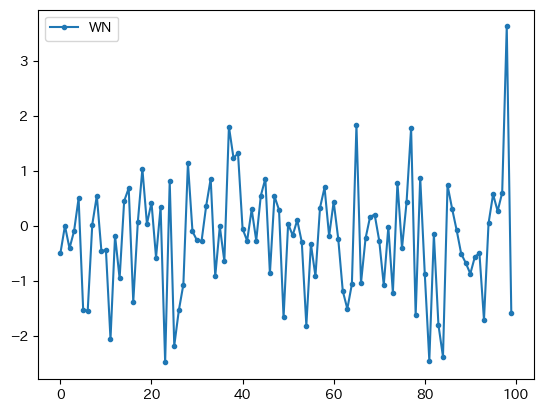

In [24]:
n = 100

vals = rng.normal(size=n)

dfwn = pd.DataFrame({'WN':vals})

dfwn.plot(marker='.')
pass

２つの特徴がある。
* 平均`0`：`0`を中心に周辺を動いている。
* 分散一定：`0`から外れても`0`に戻っている。標準正規分布の場合、`-2`から`2`の間の値を取る確率が約`95`％になる性質からも理解できるだろう。

平均と分散を計算してみよう。

In [25]:
dfwn['WN'].mean(), dfwn['WN'].var()

(-0.22156203227936383, 1.0441674619608863)

標準正規分布の母集団からのサンプル統計量であるため誤差が発生していることがわかる。

２つの特徴をを確認するために`Pandas`の`plot()`を使ってヒストグラムを描いてみよう。

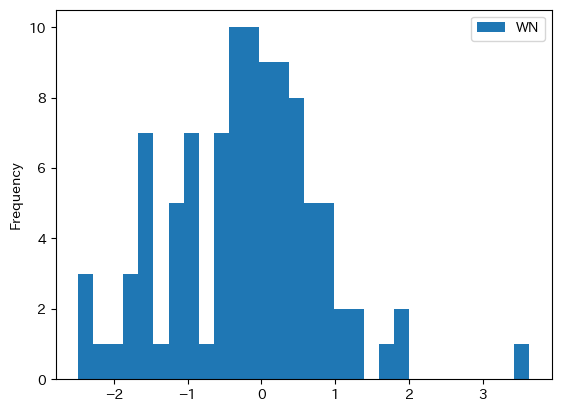

In [26]:
dfwn.plot.hist(bins=30)
pass

概ね`0`を中心に左右対象に動いている。即ち，平均`0`を反映している。また，`0`から離れている観測値が少ないことが分かる。これは`0`方向に戻ることを示しており，分散が一定となるためである。この性質は`n`を`500`や`1000`などの大きな数字に設定するより一層分かりやすいだろう。

### 自己共分散

`1`期違いの自己共分散$\sigma_{\varepsilon_t \varepsilon_{t-1}}$を計算するために，`dfwn`の列`WN`を`1`期シフトさせた新たな列`WNlag`を作成しよう。

In [27]:
dfwn['WNlag'] = dfwn['WN'].shift()
dfwn.head()

,WN,WNlag
0,-0.496247,NaN
1,0.003145,-0.496247
2,-0.406960,0.003145
3,-0.092394,-0.406960
4,0.504291,-0.092394


`WNlag`の値は`WN`の値が`1`期シフトしていることが分かる。
`0`番目の行の`WN`が初期値であり、同じ値が`1`番目の行の`WNlag`に入っている。
即ち、`1`番目の行を見ると`WN`には`1`期の値、、`WNlag`には初期（`0`期）の値がある。
同様に、各行の`WN`には`t`期の値、`WN`に`t-1`期の値が入っている。

この２つの列を使って散布図を描いてみる。`Pandas`の`plot()`で横軸・縦軸を指定し，引数`kind`で散布図を指定するだけである。

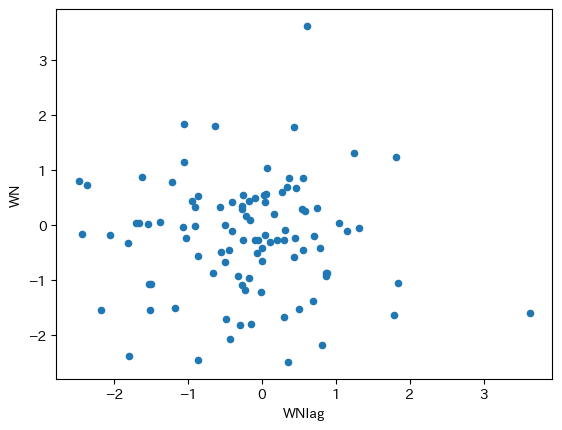

In [28]:
dfwn.plot.scatter(x='WNlag', y='WN')
pass

自己共分散がゼロであれば，ランダムに散らばっているはずであり，何らかのパターンも確認できないはずである。

ここで異なるプロットの方法を紹介する。`Pandas`のサブパッケージ`plotting`にある`lag_plot()`関数を使うと共分散の強さを示す図を簡単に作成することが可能となる。
* 必須の引数：１つの列
* オプションの引数：`lag`は時間ラグ（デフォルトは`1`）

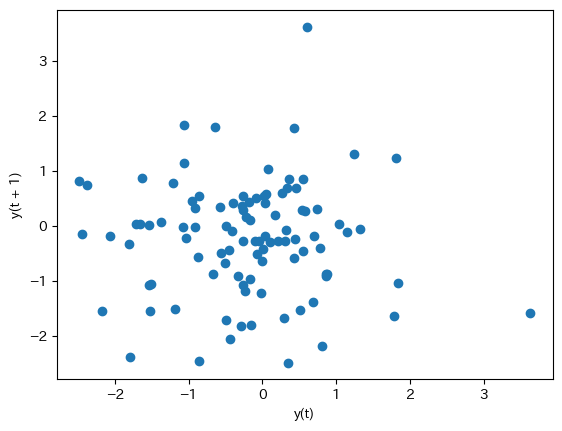

In [29]:
pd.plotting.lag_plot(dfwn['WN'])
pass

* 横軸：`t`期の値
* 縦軸：`t+1`期の値

２つの図は同じであることが確認できる。

分散・自己共分散を計算してみよう。

In [30]:
dfwn.cov()

,WN,WNlag
WN,1.044167,-0.030737
WNlag,-0.030737,1.035711


左上と右下の対角線上にあるのは、`WN`と`WNlag`の不偏分散であり、`1`に近い値となっている。両変数は標準正規分布（分散`1`）から生成したためであり、`1`にならないのはサンプルの誤差である。（`WN`と`WNlag`の不偏分散は異なるが、その理由は？）一方、右上と左下の値（同じ値となる）が**自己共分散**であり、非常に小さな値であるが、自己共分散は`0`という仮定を反映している。

### 自己相関係数

メソッド`.corr()`を自己相関係数を計算しよう。

In [31]:
dfwn.corr()

,WN,WNlag
WN,1.000000,-0.029418
WNlag,-0.029418,1.000000


右上もしくは左下にある値が自己相関係数になる。

もしちろん、列`WN`を抽出し，メソッド`autocorr()`を使って自己相関係数を計算することも可能である。

In [32]:
dfwn['WN'].autocorr()

-0.02941830514281287

また，`dfwn.cov()`を使って自己相関係数を計算することができるが、上でも説明した点に注意する必要がある。`dfwn`の`0`行目には欠損値があるため、自己共分散を計算する際にその行は使われていない。同様に、自己相関係数を計算する際は欠損値がある行を使わずに計算する必要がある。この点に注意して、次のコードで計算することができる。

In [33]:
vcov = dfwn.dropna().cov()
vcov.iloc[0,1] / ( vcov.iloc[0,0]**0.5 * vcov.iloc[1,1]**0.5 )

-0.02941830514281287

## 自己回帰モデル：AR(1)

GDPや構成要素を含め、マクロ変数の重要な特徴は持続性（正の自己相関係数）である。
この点については次章で確認するが，その基本となる統計的モデルである自己回帰モデルを考察し、それを出発点として景気循環の議論を進めていく事にする。

### 説明

ここでは持続性を捉える確率過程である自己回帰モデルを考える。英語で**A**ugo**r**egressive Modelと呼ばれ，AR(1)と表記され，次式で表される。（AR(1)の`(1)`は右辺と左辺の変数は１期しか違わないことを表している。）

$$
y_t=\rho y_{t-1}+\varepsilon_t
$$ (eq:13-ar1)

ここで
* $y_t$：$t$期の$y$の値
* $-1<\rho<1$
* $\varepsilon_t\sim WN(0,\sigma^2)$（ホワイト・ノイズ）

次の特徴がある。第一に、$\varepsilon_t$を所与とすると$y_t$の差分方程式となっている。$-1<\rho<1$となっているため，安定的な過程であることがわかる。即ち，$\varepsilon_t=0$であれば、$y_t$は定常状態である$0$に近づいて行くことになる。しかしホワイト・ノイズである$\varepsilon_t$により、毎期確率的なショックが発生し$y_t$を定常状態から乖離させることになる。第二に、今期の値$y_t$は前期の値$y_{t-1}$に依存しており，その依存度はパラメータ$\rho$によって決定される。この$\rho$こそが$y_t$の持続性の強さを決定することになり，自己回帰モデル[](eq:13-ar1)の自己相関係数は$\rho$と等しくなる。即ち、持続性を捉えるためには、$\rho\ne 0$が必須である。

ここで考えるAR(1)の特徴をまとめておこう。
1. $y_t$の確率分布が変化しない定常過程 
1. 平均は一定：$\quad\text{E}\left[y_t\right]=0$
1. 分散は一定：$\text{E}\left[y_t^2\right]=\dfrac{\sigma^2}{1-\rho^2}$（$t$の添字はない）
1. 自己共分散は一定：$\text{E}\left[y_t y_{t-s}\right]=\sigma_{y_t y_{t-s}}^2=\rho^s\dfrac{\sigma^2}{1-\rho^2}$（$s\ne 0$）。従って，

    $$
    \text{自己相関関数}(s)=\frac{\sigma_{y_t y_{t-s}}^2}
                           {\sigma_{y_t}\times\sigma_{y_{t-s}}}
                           =\rho^s
    $$
   であり，$s=1$の自己相関係数は$\rho$となる。

### ３つの例：持続性の違い

直観的にマクロ変数の特徴である持続性とは，前期の値が今期の値にどれだけ影響を持っているかを示す。$\rho$の値を変えて持続性の違いを視覚的に確認するための関数を作成しよう。

In [34]:
def ar1_model(rho, y0=0, T=100):
    """引数：
            rho: AR(1)の持続性を捉えるパラメータ
            y0:  初期値
            T:   シミュレーションの回数（デフォルト：0）
       戻り値：
            matplotlibの図を示す
            自己相関係数の値を表示する"""
    
    y = y0                          #1
    y_lst = [y]                     #2

    for t in range(1,T):            #3
        e = rng.normal()            #4
        y = rho*y + e               #5
        y_lst.append(y)            #6

    df_ar1 = pd.Series(y_lst)      #7

    ac = df_ar1.autocorr()          #8
    
    ax_ = df_ar1.plot(marker='.')   #9
    ax_.set_title(fr'$\rho$={rho}　　自己相関係数：{ac:.3f}',size=20) #10
    ax_.axhline(0, c='red')         #11

```{admonition} コードの説明
:class: dropdown

* `#1`：`for`ループで使うアップデート用の`y`であり，初期値を割り当てている。
* `#2`：`y`の値を格納するリスト。初期値を入れてある。
* `#3`：`T`期間の`for`ループの開始。変数`t`は(4)と(5)に入っていないので単にループの回数を数えている。
    * `range(1,T)`の`1`はループの計算が$t=1$期の`y`の計算から始まるため。$t=0$期の`y`は(1)で与えられている。
* `#4`：`t`期のホワイト・ノイズの生成。
* `#5`：右辺の`e`は`t`期のホワイトノイズであり，`y`前期の`y`となっている。
* `#6`：`y_list`に`y`を追加。
* `#7`：`y_list`を使って`Series`を作成し`df_ar1`に割り当てる。
* `#8`：`.autocorr()`を使い己相関係数を計算し`ac`に割り当てる。
* `#9`：`y`のプロット
    * `marker='.'`はデータのマーカーを点に設定。
    * 図の「軸」を`ax_`に割り当てる。
* `#10`：図のタイトルの設定
    * `fr`の`f`は`f-string`を表し，`{rho}`と`{ac:.3f}`に数値を代入する。`:.3f`は小数点第三位までの表示を設定
    * `fr`の`r`は`$\rho$`をギリシャ文字に変換するためののも。`$\rho$`は[LaTeX](https://ja.wikipedia.org/wiki/LaTeX)のコード。
* `#11`：`.axhline()`は横線をひくメソッド。
```

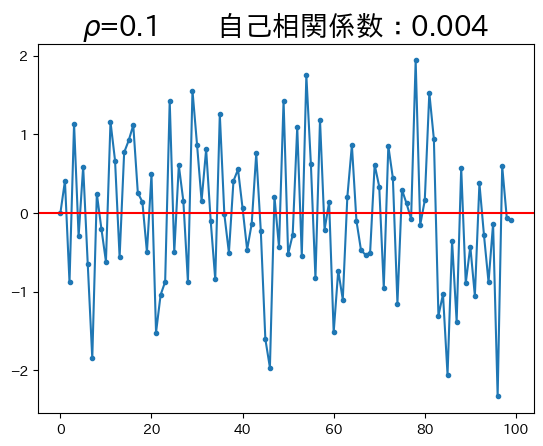

In [35]:
ar1_model(0.1)

この例では$\rho$の値が低いため，$y$は定常状態の0に直ぐに戻ろうとする力が強い。従って、前期の値の今期の値に対する影響力が小さいため、持続性が低い。

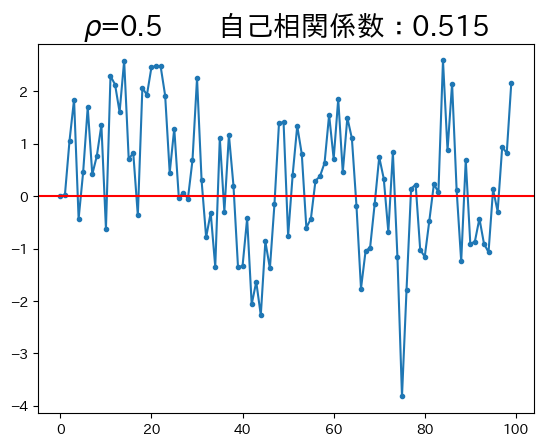

In [36]:
ar1_model(0.5)

$\rho$の値が高くなると、定常状態の$0$に戻ろうとする作用が弱くなり、持続性が強くなることがわかる。

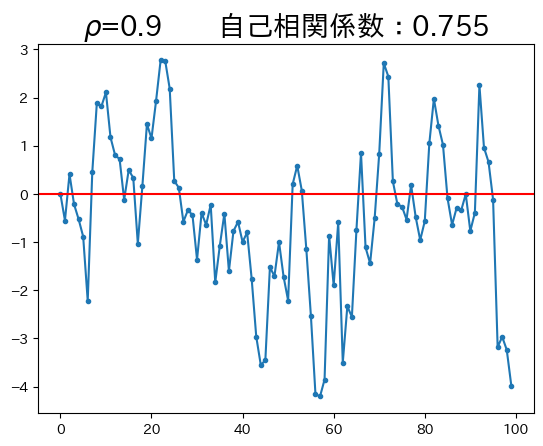

In [37]:
ar1_model(0.9)

$\rho$が非常に高いため、持続性も非常に強くなっている。即ち、今期の値は前期の値に対する依存度が大きい。